## Linear Regression  to predict Total Medals for top 25 countries
---

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### Top 25 countries that won most medals
---

In [2]:
top_df = pd.read_csv('top_25.csv')
print(top_df.shape)
top_df.head()

(25, 9)


,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals
0,USA,4,10362,565,4341,1035,802,707,2544
1,Russia,1,6323,404,3191,592,498,487,1577
2,Germany,2,8471,510,3766,442,457,490,1389
3,UK,3,7634,525,3665,278,316,298,892
4,France,2,7023,540,3479,233,255,282,770


In [3]:
# Assigning Id to each Country
top_df['CountryId'] = [(x+1) for x in range(25)]

print(top_df.shape)
top_df.head()

(25, 10)


,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId
0,USA,4,10362,565,4341,1035,802,707,2544,1
1,Russia,1,6323,404,3191,592,498,487,1577,2
2,Germany,2,8471,510,3766,442,457,490,1389,3
3,UK,3,7634,525,3665,278,316,298,892,4
4,France,2,7023,540,3479,233,255,282,770,5


In [4]:
top_df = top_df[['Country', 'CountryId']]
print(top_df.shape)
top_df.head()

(25, 2)


,Country,CountryId
0,USA,1
1,Russia,2
2,Germany,3
3,UK,4
4,France,5


### Summer Olympic data with athlete, sports, evnets and medals count
---

In [5]:
df = pd.read_csv('summer_athlete_medals_count.csv')
print(df.shape)
df.head()

(2790, 10)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals
0,1896,Greece,1,102,9,39,10,17,17,44
1,1896,USA,0,14,3,16,11,6,2,19
2,1896,Germany,0,19,6,27,7,5,2,14
3,1896,France,0,12,6,18,5,4,2,11
4,1896,UK,0,10,7,19,3,3,3,9


In [6]:
# Adding country_id column to summer df
df = pd.merge(df,top_df, how = 'left', on = 'Country')
print(df.shape)
df.head()

(2790, 11)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId
0,1896,Greece,1,102,9,39,10,17,17,44,25.0
1,1896,USA,0,14,3,16,11,6,2,19,1.0
2,1896,Germany,0,19,6,27,7,5,2,14,3.0
3,1896,France,0,12,6,18,5,4,2,11,5.0
4,1896,UK,0,10,7,19,3,3,3,9,4.0


In [7]:
# Dropping the countries that are not top 25
df = df.dropna()
print(df.shape)
df.head()

(634, 11)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId
0,1896,Greece,1,102,9,39,10,17,17,44,25.0
1,1896,USA,0,14,3,16,11,6,2,19,1.0
2,1896,Germany,0,19,6,27,7,5,2,14,3.0
3,1896,France,0,12,6,18,5,4,2,11,5.0
4,1896,UK,0,10,7,19,3,3,3,9,4.0


In [8]:
df['Athletes per event'] = round(df['Athletes']/df['Events'], 2)
print(df.shape)
df.head()

(634, 12)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId,Athletes per event
0,1896,Greece,1,102,9,39,10,17,17,44,25.0,2.62
1,1896,USA,0,14,3,16,11,6,2,19,1.0,0.88
2,1896,Germany,0,19,6,27,7,5,2,14,3.0,0.70
3,1896,France,0,12,6,18,5,4,2,11,5.0,0.67
4,1896,UK,0,10,7,19,3,3,3,9,4.0,0.53


In [9]:
df = df.drop(['Gold', 'Silver','Bronze'], axis =1)
print(df.shape)
df.head()

(634, 9)


,Year,Country,Host,Athletes,Sports,Events,Medals,CountryId,Athletes per event
0,1896,Greece,1,102,9,39,44,25.0,2.62
1,1896,USA,0,14,3,16,19,1.0,0.88
2,1896,Germany,0,19,6,27,14,3.0,0.70
3,1896,France,0,12,6,18,11,5.0,0.67
4,1896,UK,0,10,7,19,9,4.0,0.53


In [10]:
# Bring 'CountryId' column to the front
col = df.pop('CountryId')
df.insert(0,'CountryId', col)

print(df.shape)
df.head()

(634, 9)


,CountryId,Year,Country,Host,Athletes,Sports,Events,Medals,Athletes per event
0,25.0,1896,Greece,1,102,9,39,44,2.62
1,1.0,1896,USA,0,14,3,16,19,0.88
2,3.0,1896,Germany,0,19,6,27,14,0.70
3,5.0,1896,France,0,12,6,18,11,0.67
4,4.0,1896,UK,0,10,7,19,9,0.53


In [11]:
df = df.sort_values(['Year', 'Medals', 'Country'], ascending = [True, False, True])
print(df.shape)
df.head()

(634, 9)


,CountryId,Year,Country,Host,Athletes,Sports,Events,Medals,Athletes per event
0,25.0,1896,Greece,1,102,9,39,44,2.62
1,1.0,1896,USA,0,14,3,16,19,0.88
2,3.0,1896,Germany,0,19,6,27,14,0.70
3,5.0,1896,France,0,12,6,18,11,0.67
4,4.0,1896,UK,0,10,7,19,9,0.53


In [12]:
df = pd.get_dummies(df, columns = ['Country'])
print(df.shape)
df.head()

(634, 33)


,CountryId,Year,Host,Athletes,Sports,Events,Medals,Athletes per event,Country_Australia,Country_Belgium,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
0,25.0,1896,1,102,9,39,44,2.62,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1896,0,14,3,16,19,0.88,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3.0,1896,0,19,6,27,14,0.70,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,1896,0,12,6,18,11,0.67,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,1896,0,10,7,19,9,0.53,0,0,...,0,0,0,0,0,0,0,0,1,0


## Predicting medals for 2016
---

In [13]:
predict_year = 2008

#### Train data
---

In [14]:
train_df = df[df['Year'] < predict_year]
print(train_df.shape)
train_df

(559, 33)


,CountryId,Year,Host,Athletes,Sports,Events,Medals,Athletes per event,Country_Australia,Country_Belgium,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
0,25.0,1896,1,102,9,39,44,2.62,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1896,0,14,3,16,19,0.88,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3.0,1896,0,19,6,27,14,0.70,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,1896,0,12,6,18,11,0.67,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,1896,0,10,7,19,9,0.53,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,9.0,2004,0,115,20,79,7,1.46,0,0,...,0,0,0,0,0,0,1,0,0,0
2010,24.0,2004,0,52,12,35,6,1.49,0,0,...,0,1,0,0,0,0,0,0,0,0
2019,21.0,2004,0,98,19,83,5,1.18,0,0,...,0,0,0,0,0,0,0,1,0,0
2027,23.0,2004,0,50,14,41,3,1.22,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X = train_df.drop(['Medals'], axis=1)
y = train_df['Medals'].values.reshape(-1, 1)
print(X.shape, y.shape)

(559, 32) (559, 1)


#### Test data
---

In [16]:
test_df = df[df['Year'] == predict_year].sort_values(['CountryId'])
print(test_df.shape)
test_df.head()

(25, 33)


,CountryId,Year,Host,Athletes,Sports,Events,Medals,Athletes per event,Country_Australia,Country_Belgium,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
2177,1.0,2008,0,588,32,258,110,2.28,0,0,...,0,0,0,0,0,0,0,0,0,1
2179,2.0,2008,0,454,29,242,72,1.88,0,0,...,0,0,0,0,1,0,0,0,0,0
2183,3.0,2008,0,420,30,207,41,2.03,0,0,...,0,0,0,0,0,0,0,0,0,0
2180,4.0,2008,0,304,23,185,48,1.64,0,0,...,0,0,0,0,0,0,0,0,1,0
2182,5.0,2008,0,309,25,205,41,1.51,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
test_data = test_df.drop(['Medals'], axis = 1).reset_index(drop=True)
print(test_data.shape)
test_data.head()

(25, 32)


,CountryId,Year,Host,Athletes,Sports,Events,Athletes per event,Country_Australia,Country_Belgium,Country_Bulgaria,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
0,1.0,2008,0,588,32,258,2.28,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,2008,0,454,29,242,1.88,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3.0,2008,0,420,30,207,2.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,2008,0,304,23,185,1.64,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5.0,2008,0,309,25,205,1.51,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
top_df['Medals'] = test_df['Medals'].reset_index(drop=True)
print(top_df.shape)
top_df.head()

(25, 3)


,Country,CountryId,Medals
0,USA,1,110
1,Russia,2,72
2,Germany,3,41
3,UK,4,48
4,France,5,41


## Linear Regression Model
---

#### Test Train Split & Standard Scaler
---

In [19]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [20]:
print(X_train.shape, y_train.shape, X_test.shape,  y_test.shape)

(419, 32) (419, 1) (140, 32) (140, 1)


In [21]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

#### Fit the model to the training data and calculate the scores for the training and testing data

In [22]:
model1.fit(X_train, y_train)

training_score = model1.score(X_train, y_train)
testing_score = model1.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7988476441465321
Testing Score: 0.8166717491106504


Text(0.5, 1.0, 'Residual Plot')

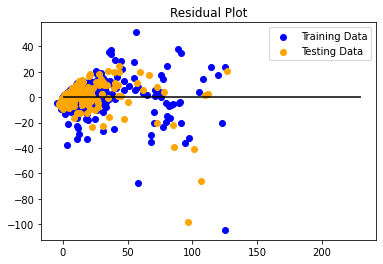

In [23]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model1.predict(X_train), model1.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model1.predict(X_test), model1.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

### Using model1 to predict medals for test_data
---

In [24]:
lg_predictions = model1.predict(test_data)
lg_predictions = np.ravel(lg_predictions)
lg_predictions

array([115.43350983,  85.22431183,  64.67901611,  28.04385757,
        25.19514847,  33.13809204,  79.6124115 ,  47.81092072,
        10.85446548,  15.79915237,  37.69030762,   4.74667358,
        28.69906235,  13.77956009,  22.68912125,  20.97429276,
        27.12446594,   5.4072113 ,  12.77125168,   2.14806366,
         0.90847015,   3.91683578,   3.36286926,   4.84446716,
         8.80215836])

In [25]:
lg_predictions = np.around(lg_predictions, decimals =0)
lg_predictions

array([115.,  85.,  65.,  28.,  25.,  33.,  80.,  48.,  11.,  16.,  38.,
         5.,  29.,  14.,  23.,  21.,  27.,   5.,  13.,   2.,   1.,   4.,
         3.,   5.,   9.])

In [26]:
top_df['Predicted'] = lg_predictions.astype(int)
top_df = top_df.rename(columns={'Medals': 'Actual'})
top_df

,Country,CountryId,Actual,Predicted
0,USA,1,110,115
1,Russia,2,72,85
2,Germany,3,41,65
3,UK,4,48,28
4,France,5,41,25
5,Italy,6,27,33
6,China,7,100,80
7,Australia,8,46,48
8,Sweden,9,5,11
9,Hungary,10,10,16


In [27]:
top_df['Error'] = top_df['Predicted'] - top_df['Actual']
top_df

,Country,CountryId,Actual,Predicted,Error
0,USA,1,110,115,5
1,Russia,2,72,85,13
2,Germany,3,41,65,24
3,UK,4,48,28,-20
4,France,5,41,25,-16
5,Italy,6,27,33,6
6,China,7,100,80,-20
7,Australia,8,46,48,2
8,Sweden,9,5,11,6
9,Hungary,10,10,16,6


In [28]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(top_df['Actual'], lg_predictions)
r2 = model1.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 106.32, R2: 0.8166717491106504


### Plot Residuals
---

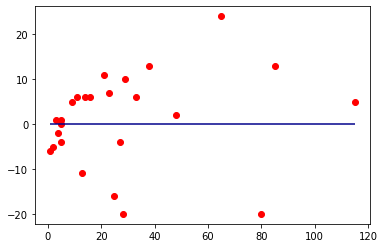

In [29]:
y = top_df['Actual']
plt.scatter(lg_predictions, lg_predictions - y, c = 'red')

plt.hlines(y=0, xmin=lg_predictions.min(), xmax=lg_predictions.max(), colors ="darkblue")
plt.show()